In [84]:
import numpy as np
import matplotlib.pyplot as plt


In [85]:
data = np.genfromtxt('data.csv', delimiter=',')
data

array([[6.7, 9.1],
       [4.6, 5.9],
       [3.5, 4.6],
       [5.5, 6.7]])

In [86]:
area = data[:, 0].tolist()
price = data[:, 1].tolist()
N = len(area)

In [87]:
b = 0.04
w = -0.34
lr = 0.02
epoch_max = 10
losses = []

In [88]:
def predict(x, w, b):
    return x*w +b

def compute_loss(y_hat, y):
    return (y_hat - y)**2

def compute_gradient(y_hat, y, x):
    dw = 2*x*(y_hat - y)
    db = 2*(y_hat - y)
    return (dw, db)

def update_weight(w, b, dw, db, lr):
    w_new = w - lr*dw
    b_new = b - lr*db
    return (w_new, b_new)

In [89]:
# train

for _ in range(epoch_max):
    for i in range(N):
        # get data
        x = area[i]
        y = price[i]
        # predict
        y_hat = predict(x, w, b)
        # compute loss
        loss = compute_loss(y_hat, y)
        losses.append(loss)

        # compute gradient
        (dw, db) = compute_gradient(y_hat, y, x)

        # update weight
        (w, b) = update_weight(w, b, dw, db, lr)

print(w, b)

1.192491163985917 0.017371370027855694


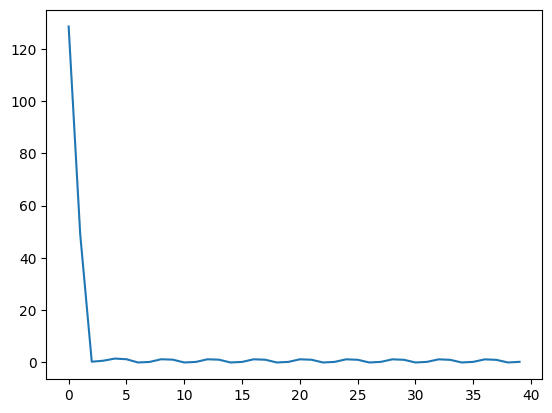

In [90]:
plt.plot(losses)

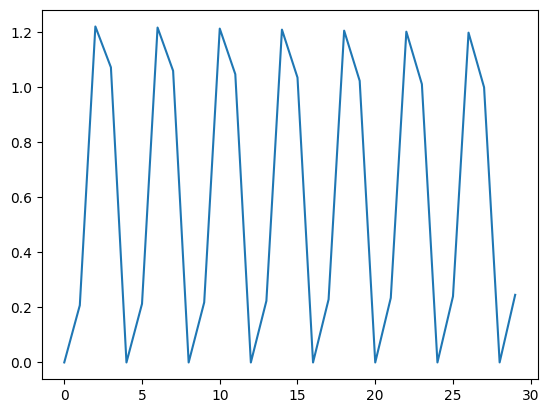

In [91]:
plt.plot(losses[10:])

In [92]:
area_real = 6
w, b = 1.192491163985917, 0.017371370027855694
predict_price = area_real*w + b
predict_price

7.172318353943358

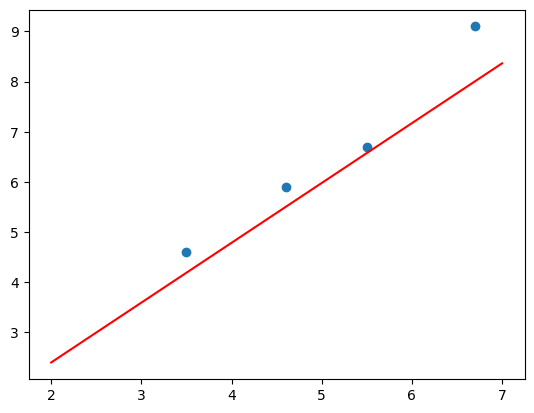

In [93]:
x_data = np.arange(2,8)
y_data = [x*w +b for x in x_data]
plt.plot(x_data, y_data, 'r')
plt.scatter(area, price)
